In [51]:
import numpy as np
import rasterio as rio

import matplotlib.pyplot, matplotlib.colors

import os, json 

import ee, ee.batch
import geetools, geetools.batch

In [84]:
# Uncomment to use the hand-labeled images
_img_path = "/home/cmich/v1.1/data/flood_events/HandLabeled/S1Hand/"
_mask_path = "/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/"
_catalog_path = "/home/cmich/v1.1/catalog/sen1floods11_hand_labeled_label/"

# Uncomment to use the weakly-labeled images
# _img_path = "/home/cmich/v1.1/data/flood_events/WeaklyLabeled/S1Weak/"
# _mask_path = "/home/cmich/v1.1/data/flood_events/WeaklyLabeled/S2IndexLabelWeak/"
# _catalog_path = "/home/cmich/v1.1/catalog/sen1floods11_weak_labeled_label/"

# General Regions of interest. The original Sen1Floods11 dataset contains 
# satellite images from 11 distinct countries/regions. Since we are dealing 
# with sequences of satellite images, we choose a subset of countries 
# with roughly the same geographic latitude so that the revisit period of the 
# sentinel -1 and -2 satellites remains constant across the entire dataset.
regions = { 
    "India", 
    "Pakistan", 
#     "Mekong" 
}

# Uncomment to use the following regions 
# regions = { "Ghana", "Nigeria" }
# regions = { "Bolivia, "Paraguay" }

In [85]:
land_use_dict = {}

for file in os.listdir(_mask_path):
    # file path 
    file_path = _mask_path + file
    file_prefix = file.split("_")[0] + "_" + file.split("_")[1]

    # Discard this file if it does not belong to one of the selected regions
    try:
        region = file.split("_")[0]

        if region not in regions: 
            continue
    except:
        print("{}: Invalid file name".format(file))
        continue
    
    # Load the segmentation mask
    try: 
        mask = rio.open(file_path).read()[0,:,:]
    except: 
        print("{} does not exist!".format(file_path))
        continue
    
    # Histogram of land-coverage (ie percentage of water pixels, soil pixels and cloud pixels)
    unique, counts = np.unique(mask.flatten(), return_counts=True)
    hist = dict(zip(unique, counts))

    for i in (-1, 0, 1):
        if i not in hist:
            hist[i] = 0

    # Measure water-coverage ratio for this particular segmentation mask
    water_count = hist[1]
    soil_count = hist[0]
    water_ratio = 100 * water_count / (water_count + soil_count + 1)

    # Discard images with negligible water coverage and images
    # which are saturated with water
    # Keep the rest in a dictionary
    if water_ratio > 10 and water_ratio < 100:
        land_use_dict[file] = water_ratio
        print(file)

print( "\nTotal number of selected regions: {}".format( len(land_use_dict) ) )

India_533192_LabelHand.tif
India_383430_LabelHand.tif
India_391908_LabelHand.tif
India_1018317_LabelHand.tif
India_80221_LabelHand.tif
India_943439_LabelHand.tif
India_1050276_LabelHand.tif
India_1068117_LabelHand.tif
Pakistan_35915_LabelHand.tif
India_103447_LabelHand.tif
India_591317_LabelHand.tif
Pakistan_1027214_LabelHand.tif
India_1018327_LabelHand.tif
India_399883_LabelHand.tif
India_1017769_LabelHand.tif
India_500266_LabelHand.tif
India_287642_LabelHand.tif
India_773682_LabelHand.tif
India_804466_LabelHand.tif
India_900498_LabelHand.tif
India_207862_LabelHand.tif
India_180633_LabelHand.tif
Pakistan_1036366_LabelHand.tif
Pakistan_849790_LabelHand.tif
India_285297_LabelHand.tif
India_956930_LabelHand.tif
India_747992_LabelHand.tif
India_91379_LabelHand.tif
Pakistan_94095_LabelHand.tif

Total number of selected regions: 29


1.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/India_533192_LabelHand.tif


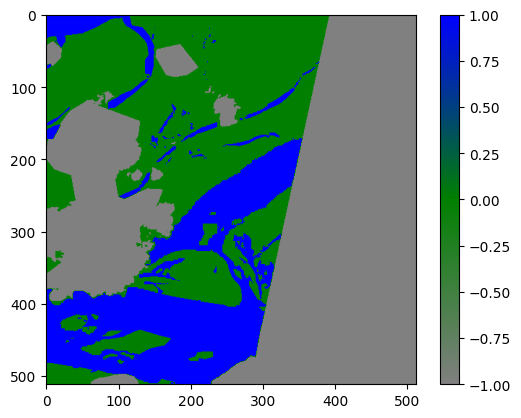

2.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/India_383430_LabelHand.tif


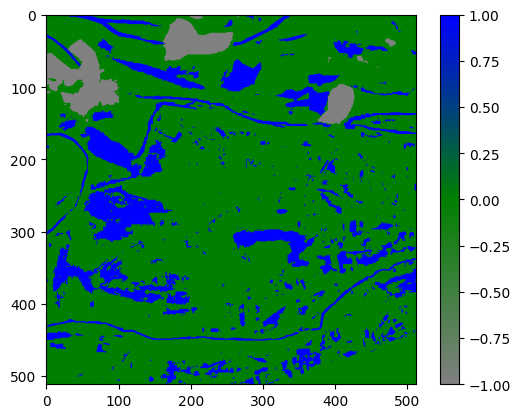

3.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/India_391908_LabelHand.tif


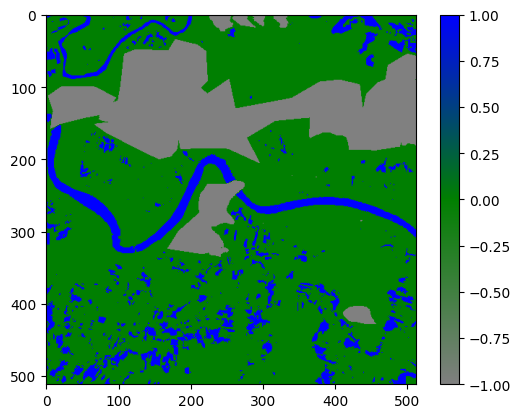

4.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/India_1018317_LabelHand.tif


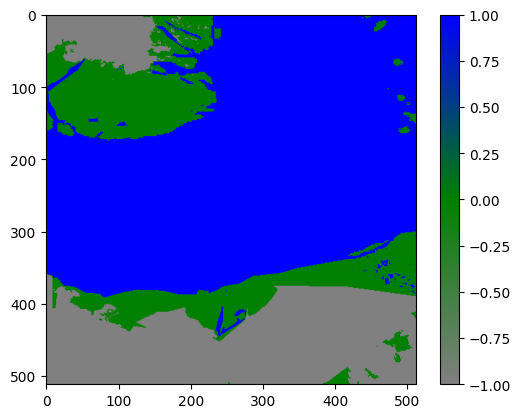

5.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/India_80221_LabelHand.tif


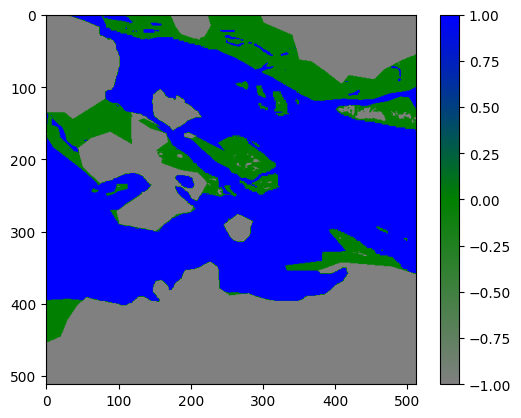

6.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/India_943439_LabelHand.tif


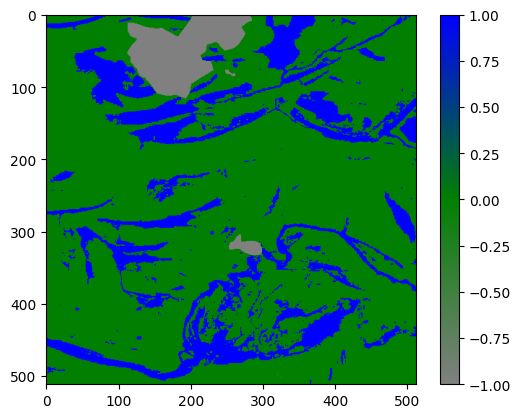

7.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/India_1050276_LabelHand.tif


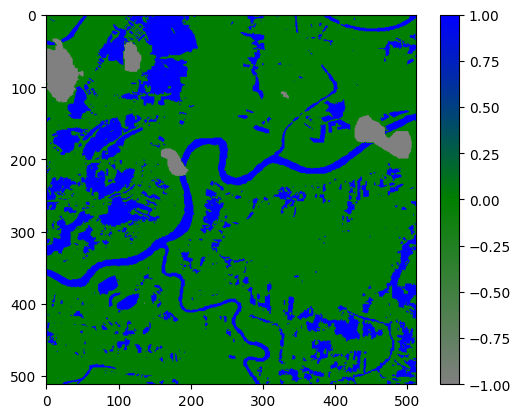

8.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/India_1068117_LabelHand.tif


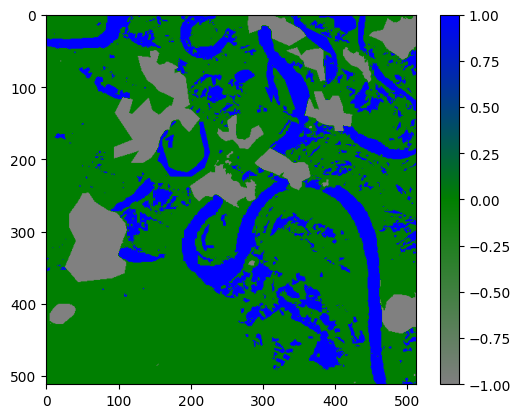

9.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Pakistan_35915_LabelHand.tif


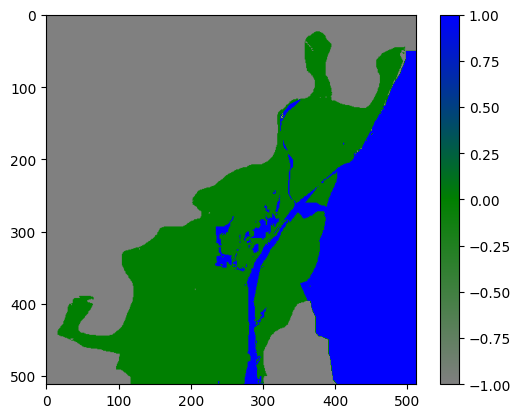

10.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/India_103447_LabelHand.tif


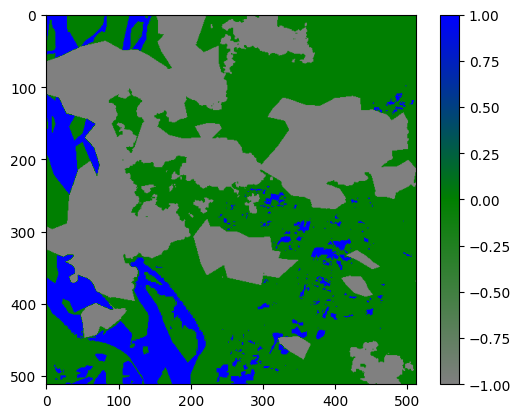

11.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/India_591317_LabelHand.tif


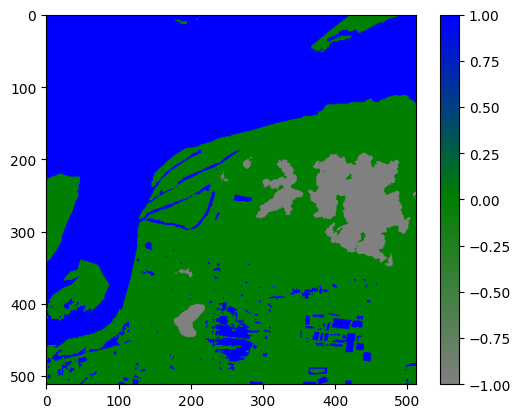

12.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Pakistan_1027214_LabelHand.tif


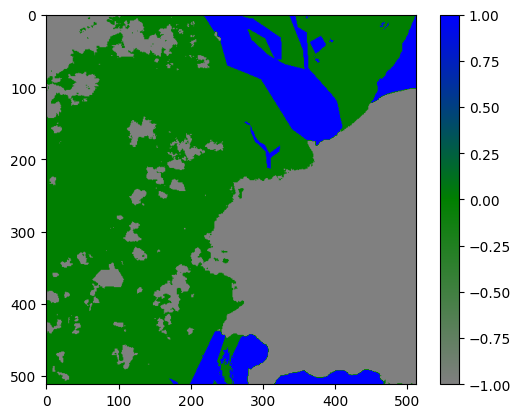

13.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/India_1018327_LabelHand.tif


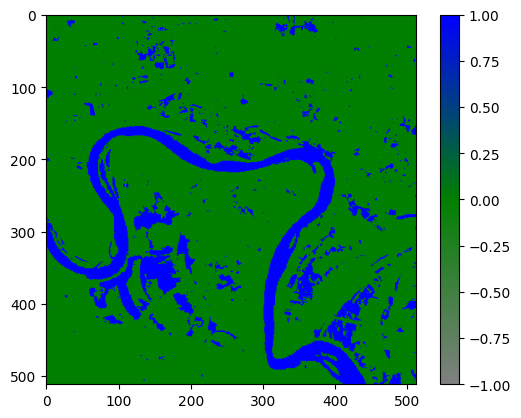

14.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/India_399883_LabelHand.tif


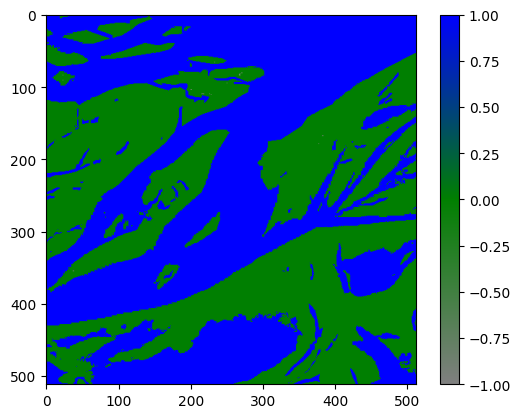

15.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/India_1017769_LabelHand.tif


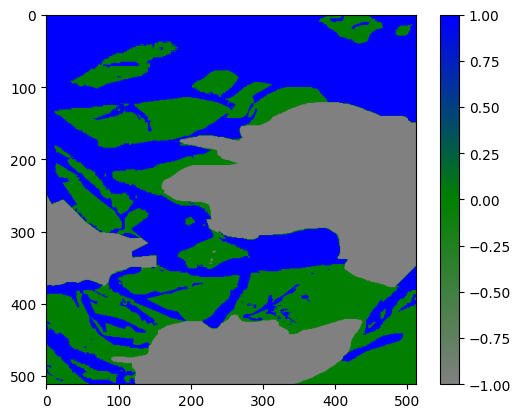

16.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/India_500266_LabelHand.tif


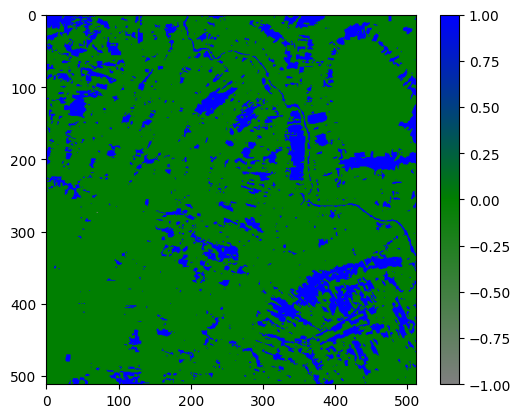

17.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/India_287642_LabelHand.tif


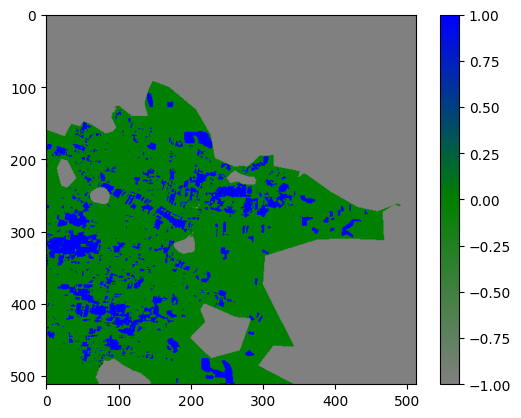

18.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/India_773682_LabelHand.tif


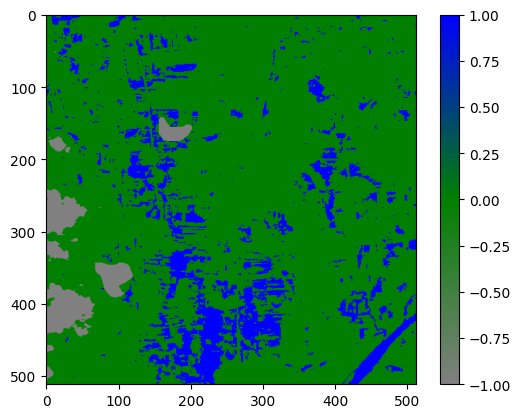

19.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/India_804466_LabelHand.tif


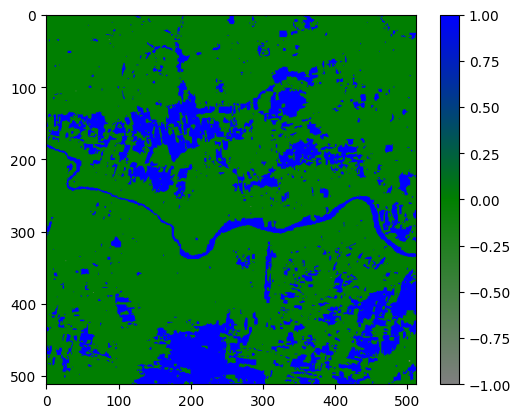

20.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/India_900498_LabelHand.tif


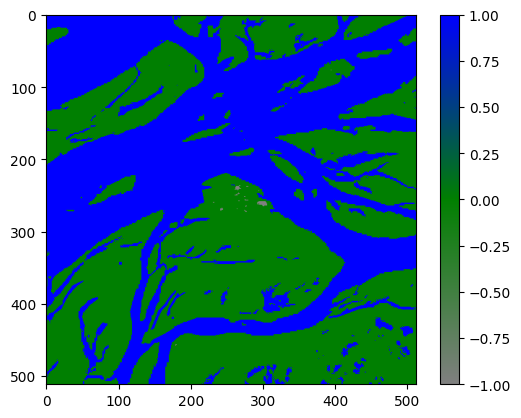

21.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/India_207862_LabelHand.tif


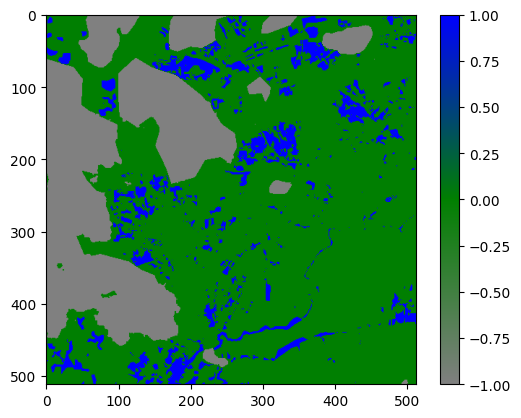

22.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/India_180633_LabelHand.tif


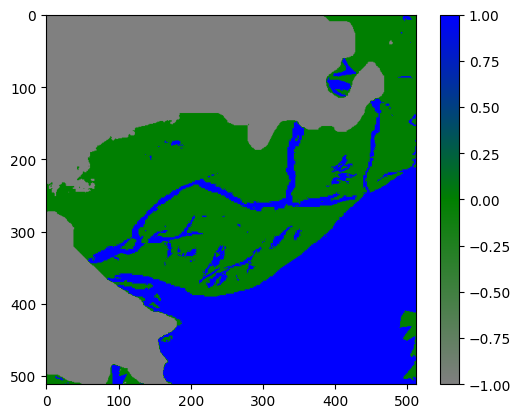

23.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Pakistan_1036366_LabelHand.tif


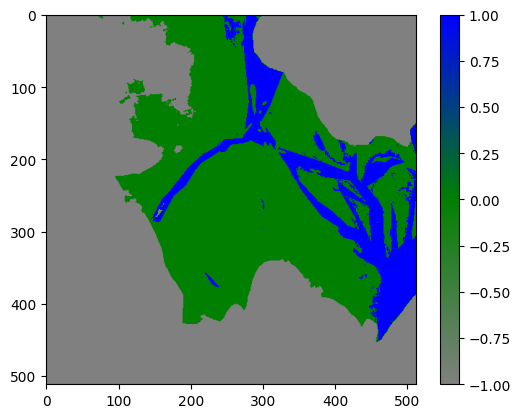

24.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Pakistan_849790_LabelHand.tif


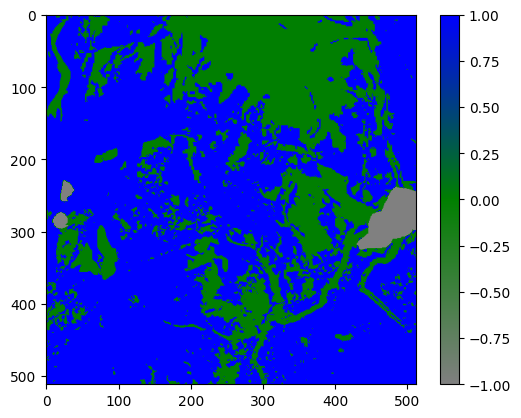

25.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/India_285297_LabelHand.tif


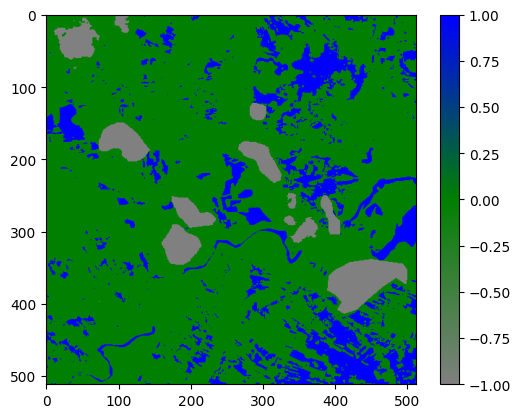

26.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/India_956930_LabelHand.tif


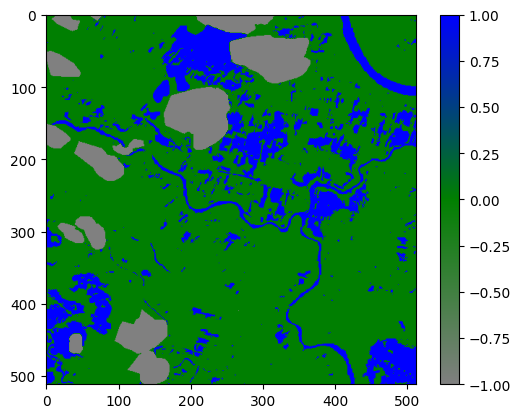

27.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/India_747992_LabelHand.tif


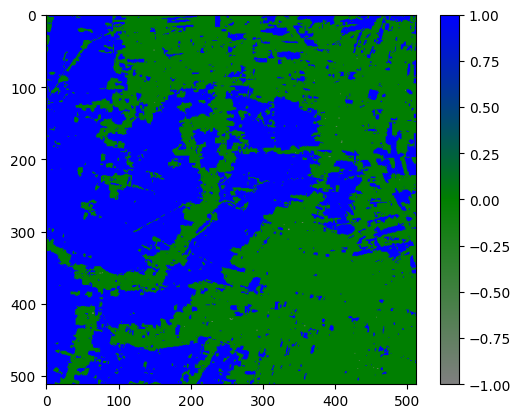

28.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/India_91379_LabelHand.tif


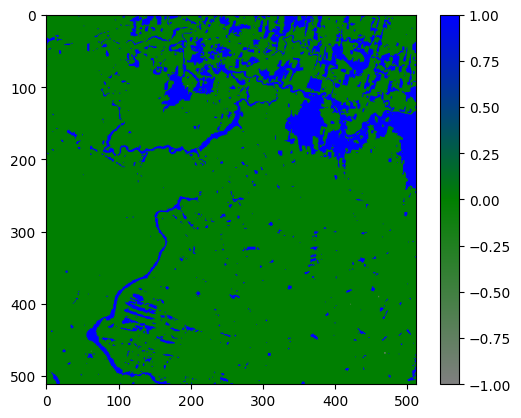

29.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Pakistan_94095_LabelHand.tif


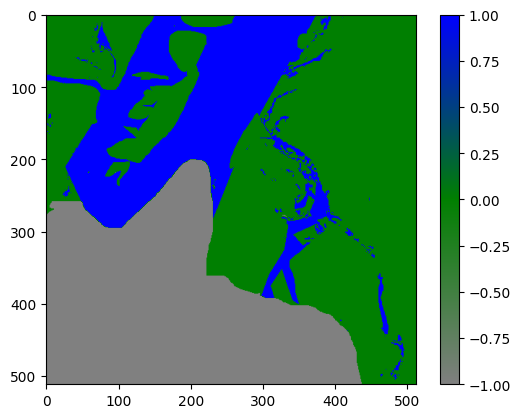

In [86]:
# Iterate through the selected images 
for i,key in enumerate(land_use_dict):
    print("{}.\t{}".format(i+1, _mask_path + key))

    # Plot the segmentation mask 
    try:
        mask = rio.open(_mask_path + key).read()[0,:,:]
    except: 
        print("{} does not exist".format(_mask_path + key))
    
    # Colormap settings: 
    # Blue  -> Soil Class [+1]
    # Green -> Water Class [0]
    # Gray  -> NoData Class [-1]
    norm = matplotlib.pyplot.Normalize(-1,+1)
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["gray","green","blue"])

    matplotlib.pyplot.figure(i)
    matplotlib.pyplot.imshow(mask, cmap=cmap, norm=norm)
    matplotlib.pyplot.colorbar()
    matplotlib.pyplot.show() 

In [87]:
aoi = []

# Iterate through all the selected files / segmentation masks
for i, key in enumerate(land_use_dict):
    
    # Find the corresponding geoJSON file 
    file_prefix = key.split("_")[0] + "_" + key.split("_")[1]
    geoJSON_path = _catalog_path + file_prefix + "_label/" + file_prefix + "_label.json"
    
    # Read the contents of the geoJSON file 
    with open(geoJSON_path, 'r') as geoJSON_file:  
        geoJSON = json.load(geoJSON_file) 

    # Retrieve the coordinates of the region  
    x = 0.5 * (geoJSON['bbox'][0] + geoJSON['bbox'][2]) 
    y = 0.5 * (geoJSON['bbox'][1] + geoJSON['bbox'][3]) 
    
    # Retrieve the acquisition date of the image
    date = geoJSON['properties']['datetime']

    # Save the area of interest to a list for later use
    aoi.append((geoJSON_path, x, y))

    # Print the coordinates of the region
    print(i, *aoi[i])

Idx			|ROI			|Lon			|Lat			
0 /home/cmich/v1.1/catalog/sen1floods11_hand_labeled_label/India_533192_label/India_533192_label.json 93.89622540953616 26.791355033580608
1 /home/cmich/v1.1/catalog/sen1floods11_hand_labeled_label/India_383430_label/India_383430_label.json 93.5282754691608 26.65337380593985
2 /home/cmich/v1.1/catalog/sen1floods11_hand_labeled_label/India_391908_label/India_391908_label.json 92.56240687567549 26.19343638047065
3 /home/cmich/v1.1/catalog/sen1floods11_hand_labeled_label/India_1018317_label/India_1018317_label.json 92.7923755884101 26.56138632084601
4 /home/cmich/v1.1/catalog/sen1floods11_hand_labeled_label/India_80221_label/India_80221_label.json 92.74638184586317 26.56138632084601
5 /home/cmich/v1.1/catalog/sen1floods11_hand_labeled_label/India_943439_label/India_943439_label.json 93.34430049897313 26.60738006339293
6 /home/cmich/v1.1/catalog/sen1floods11_hand_labeled_label/India_1050276_label/India_1050276_label.json 92.51641313312858 26.19343638047065
7 /ho

In [1]:
# Index of the selected chip (Check the output of the previous cell)
idx = 6

ee.Authenticate()
ee.Initialize()

# The original Sen1Floods11 dataset consists of 1km x 1km chips (with more or less) even terrain. For our purposes, 
# we increase the size at 25km x 25km in order to take into account regions with more diverse terrain (plains, slopes, urban areas ...)
# 
# The following command generates a 625km2 square centered around the original region.
roi = ee.Geometry.Point(aoi[idx][1], aoi[idx][2]).buffer(ee.Number(625000000).sqrt().divide(2), 1).bounds()

# Start Date: April 2017. This is just a few days after the launch of Sentinel-2B. Technically, it is possible
# to go all the way back to July 2015. However, only Sentinel-2A was operational at the time. Therefore, revisit 
# period was twice as long for the Sentinel-2 mission (Almost 10 days for regions near the equator) 
# 
# Stop Date: May 2024 (Present day). You may also choose December 2021. This is when Sentinel-1B 
# stopped delivering radar data due to an irreversible hardware failure on its electronics. Therefore,
# revisit period after December 2021 is twice as long for the Sentinel-1 mission.
# 
start_date, stop_date = '2017-04-01', '2024-05-01'

# Elevation Model for the region of interest
DEM = ee.ImageCollection(
    'COPERNICUS/DEM/GLO30'
).select(
    # Select 'DEM' band. That is the 'Digital-Elevation-Model' band.
    selectors = ['DEM']
).filterBounds(
    # Filter images based on the provided ROI geometry
    geometry = roi
).map( 
    # Clip all the remaining images based on the provided ROI geometry
    algorithm = lambda image: image.clip(roi) 
)                                     

# Extract a 'terrain-slope' map from the DEM. In simple terms, 
# slope is the 'steepness' of the terrain expressed as an angle 
# in the [0 -> 90) interval
slope = DEM.map(algorithm = ee.Terrain.slope).mosaic() 

# Extract a 'terrain aspect' map from the DEM. Terrain aspect 
# is the compass direction of a slope (North, East, South, West) 
# expressed as an angle in the [0 -> 360) interval.
aspect = DEM.map(algorithm = ee.Terrain.aspect).mosaic()

# Merge the DEM, slope and aspect images into a single image with multiple channels/bands
DEM = DEM.mosaic().addBands(slope.rename('slope'), ['slope']).addBands(aspect.rename('aspect'), ['aspect'])

# 
# Sentinel-2 derived features:
# 
# 1. Normalized-difference-water-index (NDWI): 
# It is used for detecting the presence of water on satellite images. 
# The prediction-model receives a stream of past NDWI maps for a specific 
# region and attempts to predict the water-coverage (segmentation-mask) 
# for the next time-steps based on this information.
# 
# Since the presence of water is strongly correlated with positive 
# NDWI values, the segmentation of the satellite images is performed 
# automatically by thresholding the NDWI maps at zero.
# 
# 2. Modified, normalized-difference-water-index (mNDWI). A slightly 
# modified version of the original NDWI metric. 
# 
# 3. Normalized-difference-vegetation-index (NDVI): 
# It is used for quantifying the vegetation-density of an area. Positive 
# values (close to +1) strongly correlate with dense vegetation. On the 
# other hand, negative values indicate the presence of water. Finally, 
# positive values close to zero typically correspond to bare soil with 
# little to no vegetation growth.  
# 
features = ee.ImageCollection(
    'COPERNICUS/S2_SR_HARMONIZED'
).filterBounds(
    # Spatial filtering based on the provided ROI geometry
    geometry = roi
).filterDate(
    # Temporal filtering based on acquisition date
    start = start_date, 
    end = stop_date
).select(
    # 'B4' and 'B8'. Required bands for NDVI 
    # 'B3' and 'B8'. Required bands for NDWI
    # 'B3' and 'B11'. Required bands for mNDWI
    selectors = ['B3', 'B4', 'B8', 'B11', 'B12']
).map( 
    # Clip all remaining images of the collection based on the provided ROI geometry.
    lambda image: image.clip(roi) 
).map( 
    # Calculate NDVI
    algorithm = lambda image: image.addBands( image.normalizedDifference(['B8', 'B4']).rename(['NDVI']), ['NDVI'] ) 
).map( 
    # Calculate NDWI
    algorithm = lambda image: image.addBands( image.normalizedDifference(['B3', 'B8']).rename(['NDWI']), ['NDWI'] ) 
).map( 
    # Calculate mNDWI
    algorithm = lambda image: image.addBands( image.normalizedDifference(['B3', 'B11']).rename(['mNDWI']), ['mNDWI'] ) 
).select(
    # Drop the original Sentinel-2 bands and keep only NDVI, NDWI and mNDWI
    selectors = ['NDVI', 'NDWI', 'mNDWI']
)

# Fetch a cloud-probability mask for every image. Cloud probabilities 
# may be used later during training to mask certain parts of the image. 
cloud_prob = ee.ImageCollection(
    # An image-collection with pre-computed cloud masks
    'COPERNICUS/S2_CLOUD_PROBABILITY'
).filterBounds(
    # Spatial filtering based on the provided ROI geometry
    geometry = roi
).filterDate(
    # Temporal filtering based on acquisition dates
    start = start_date, 
    end = stop_date
).map( 
    # Clip the remaining images based on the provided ROI geometry
    algorithm = lambda image: image.clip(roi) 
).select(
    selectors = ['probability']
)

# Join the Sentinel-2 feature maps with their corresponding cloud probability mask 
masked_s2_features = ee.ImageCollection(
    ee.Join.saveFirst(matchKey = 'cloud_mask').apply(
        primary = features, 
        secondary = cloud_prob, 
        condition = ee.Filter.equals(
            leftField = 'system:index',
            rightField = 'system:index'
        )
    )
).map( 
    # Extract the cloud-mask feature and add it as a separate band in the final sentinel-2 image.
    algorithm = lambda img : img.addBands(ee.Image(img.get(property = 'cloud_mask')).select(['probability']).rename(['cloud_prob']), ['cloud_prob']) 
)

# Sentinel-1 Image Collection. (Synthetic Aperture Radar)  
s1_features = ee.ImageCollection(
    'COPERNICUS/S1_GRD'
).filterBounds(
    geometry = roi
).filterDate(
    start = start_date, 
    end = stop_date
).filter(
    ee.Filter.listContains('transmitterReceiverPolarisation', 'VV')
).filter(
    ee.Filter.listContains('transmitterReceiverPolarisation', 'VH')
).filter(
    ee.Filter.eq('instrumentMode', 'IW')
).select(
    selectors = ['VV', 'VH']
)

# Join the Sentinel-2 image-collection (primary collection) with the Sentinel-1 image-collection (secondary collection)
# This operation is performed based on the acquisition date of the images. Namely, for every Sentinel-2 derived image, 
# we find a Sentinel-1 image which was acquired within a 6-day time-window. Otherwise, we drop the Sentinel-2 image 
# from the final image-collection
s1_s2_features = ee.ImageCollection(
    ee.Join.saveBest(
        matchKey = 'acquisition_date', 
        measureKey = '', 
    ).apply(
        primary = masked_s2_features, 
        secondary = s1_features, 
        condition = ee.Filter.maxDifference(
            difference = 6 * 24 * 60 * 60 * 1000, 
            leftField = 'system:time_start', 
            rightField = 'system:time_start'
        )
    )
).map(
    # Add VV polarization as a separate band
    lambda img: img.addBands( ee.Image( img.get(property = '') ).select(['VV']).rename(['VV']), ['VV']) 
).map(
    # Add VH polarization as a separate band
    lambda img: img.addBands( ee.Image( img.get(property = '') ).select(['VH']).rename(['VH']), ['VH'])
)


NameError: name 'ee' is not defined

In [84]:
region = aoi[idx][0]

# Export Jobs for Sentinel-2 and Sentinel-1 images
geetools.batch.Export.imagecollection.toDrive(
    collection = masked_features, 
    folder = "features/" + region + "/sentinel", 
    namePattern = '{system_date}', 
    scale = 30,
    dataType = "float", 
    region = None, 
    datePattern = 'dd-MM-yyyy',
    extra = None, 
    verbose = True
)

# Export Job for DEM image
ee.batch.Export.image.toDrive(
    image = DEM,
    description = region + "_DEM",
    fileNamePrefix = region + "_DEM",
    folder = region, 
    fileFormat = "GeoTIFF", 
    region = roi, 
    scale = 30
).start()